In [3]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- count len of sentences, words, text, paragraphs

In [33]:
with open("../data/raf.txt", 'r') as text:
    textfile = text.read()
#     print(textfile)

In [34]:
type(textfile)

str

In [35]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(textfile)

In [36]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 2944 samples and 10531 outcomes>


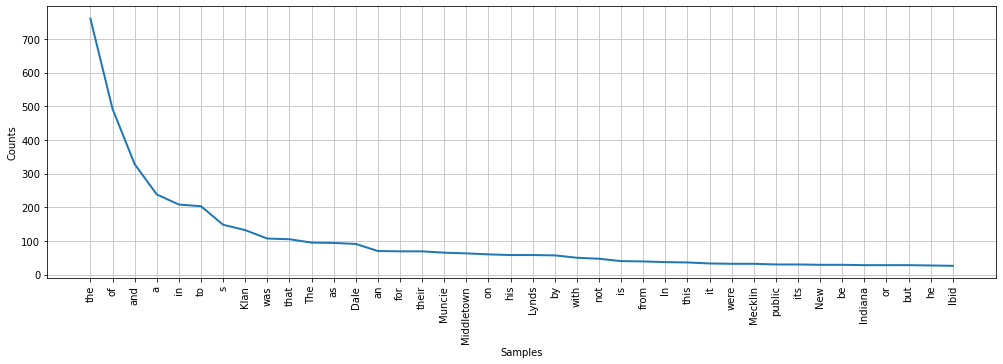

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
plt.figure(figsize=(17,5))
fdist.plot(40)

In [38]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'am', 'he', 'with', 'which', 'a', 'are', 'only', 'isn', 'was', 'about', 'off', 'were', "should've", 'over', 'those', 'yours', 'after', "you've", 'do', "wouldn't", "that'll", "won't", 'they', 'if', 'have', 'be', "haven't", 'who', 'few', 'than', 'very', 'themselves', 'further', "you'll", 'didn', 'its', 'himself', 'whom', 'no', 'has', 'most', 'can', 'ma', 'so', 'll', 'o', 'or', 'aren', 'doesn', 'my', "aren't", 'hers', 'any', 'm', 'when', 'some', 'won', "she's", 'you', 'me', "needn't", 'all', 'ain', "doesn't", 'itself', 'ourselves', 'did', 'mustn', 'how', 'your', 'our', 'but', 'yourself', 'as', 'against', 'from', 'nor', 've', 'his', 'hasn', 'such', 'shan', 'before', 'up', 'd', "didn't", 's', 'not', 'under', 'him', "isn't", 'this', 'just', 'weren', 'does', 'should', 'these', 're', 'being', 't', "hasn't", "you'd", 'herself', 'again', 'there', 'above', 'had', 'own', 'the', 'both', "wasn't", 'between', 'what', 'that', 'each', "shouldn't", "it's", 'myself', 'is', 'until', 'them', 'yourselves',

In [39]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
# print("Filterd Sentence:",filtered_review)

In [40]:
print(len(tokenized_review))
print(len(filtered_review))

10531
6494


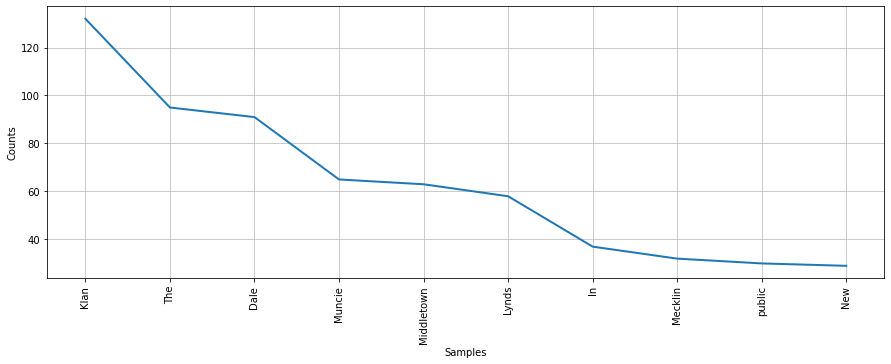

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [41]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(15,5))
fdist.plot(10)